In [5]:
from airsenal.framework.bpl_interface import *
from airsenal.framework.utils import *

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
model_team = get_fitted_team_model(get_current_season(), session)

In [48]:
# extract indices of current premier league teams
# val-1 because 1-indexed in model but 0-indexed in python
current_idx = {key: val-1 for key, val in model_team.team_indices.items()
               if key in CURRENT_TEAMS}

top6 = ['MCI', 'LIV', 'TOT', 'CHE', 'MUN', 'ARS']

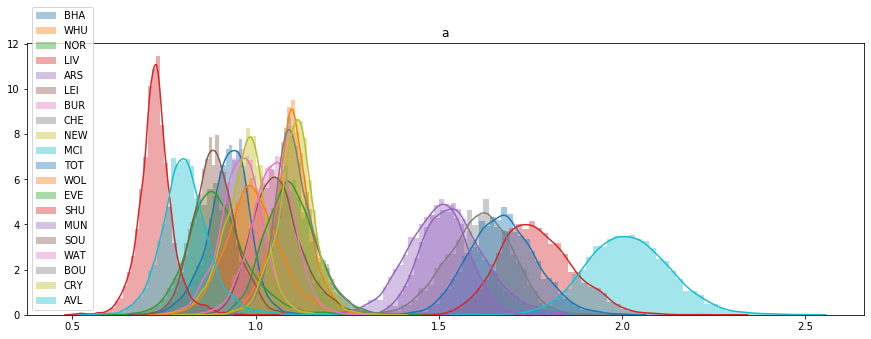

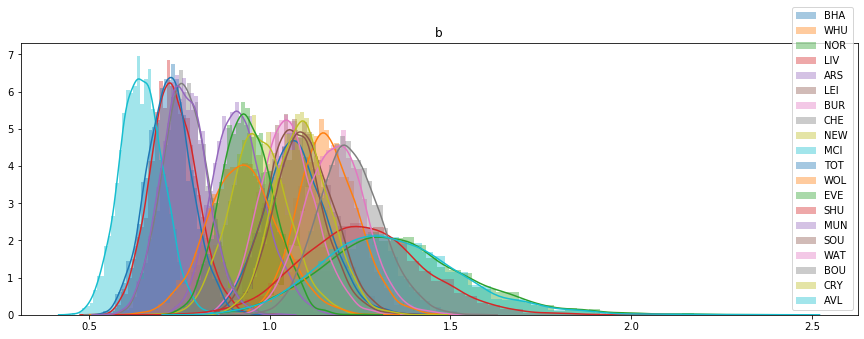

In [55]:
ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in current_idx.items():
    sns.distplot(model_team.a[:, idx], label=team)
plt.title('a')
plt.legend()

ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in current_idx.items():
    sns.distplot(model_team.b[:, idx], label=team)
plt.title('b')
plt.legend()

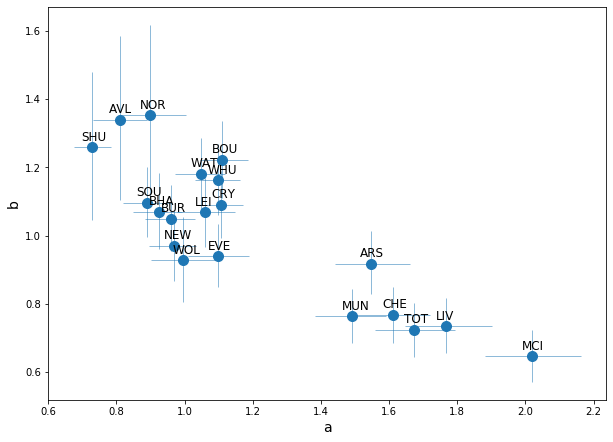

In [308]:
a_mean = model_team.a.mean(axis=0)
b_mean = model_team.b.mean(axis=0)

a_conf95 = np.abs(np.quantile(model_team.a,[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(model_team.b, [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(model_team.a,[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(model_team.b, [0.1, 0.9], axis=0) - b_mean)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(aspect='equal')
plt.errorbar(a_mean[list(current_idx.values())],
             b_mean[list(current_idx.values())],
             xerr=a_conf80[:, list(current_idx.values())],
             yerr=b_conf80[:, list(current_idx.values())],
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('a', fontsize=14)
plt.ylabel('b', fontsize=14)

for team, idx in current_idx.items():
    ax.annotate(team,
                (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                fontsize=12)

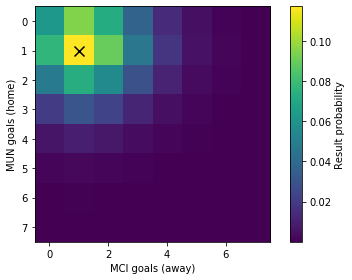

In [210]:
model_team.plot_score_probabilities('MUN', 'MCI');

In [89]:
model_team.concede_n_probability(2, 'MUN', 'MCI')

0.25226389297203444

In [92]:
model_team.score_n_probability(2, 'MUN', 'MCI')

0.22230607001289662

In [94]:
model_team.overall_probabilities('MUN', 'MCI')

(0.3100531079414408, 0.44021793278849797, 0.24972895924293415)

In [95]:
model_team.score_probability('MUN', 'MCI', 2, 2)

0.056097232649260295

In [96]:
model_team.log_score()

-2.8437779361822857

(-1, 8)

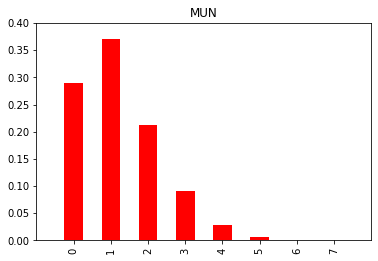

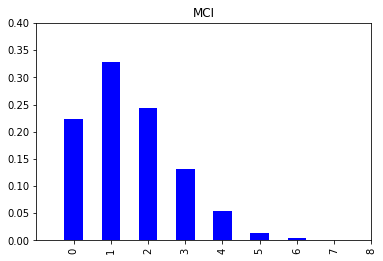

In [164]:
sim = model_team.simulate_match('MUN', 'MCI')
sim['MUN'].value_counts(normalize=True).sort_index().plot.bar(color='r')
plt.title('MUN')
plt.ylim([0, 0.4])
plt.xlim([-1, 8])

plt.figure()
sim['MCI'].value_counts(normalize=True).sort_index().plot.bar(color='b')
plt.title('MCI')
plt.ylim([0, 0.4])
plt.xlim([-1, 8])

Text(0.5, 1.0, 'beta_b')

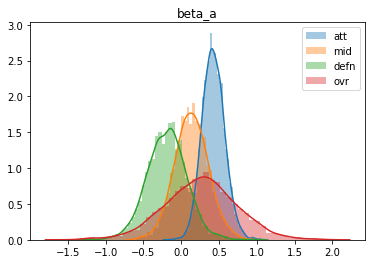

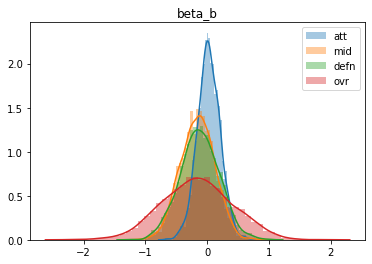

In [306]:
# team features (excluding first column which is team name)
feats = model_team.X.columns[1:]

for idx in range(model_team.beta_a.shape[1]):
    sns.distplot(model_team.beta_a[:,idx], 
                 label=feats[idx])

plt.legend()
plt.title('beta_a')

plt.figure()
for idx in range(model_team.beta_b.shape[1]):
    sns.distplot(model_team.beta_b[:,idx],
                 label=feats[idx])
plt.legend()
plt.title('beta_b')

(-0.9551699214640744, 0.6621660226045335)

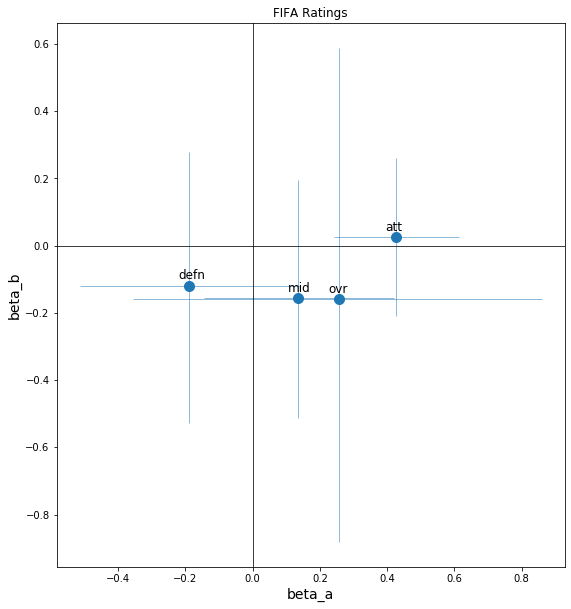

In [307]:
beta_a_mean = model_team.beta_a.mean(axis=0)
beta_b_mean = model_team.beta_b.mean(axis=0)

beta_a_conf95 = np.abs(np.quantile(model_team.beta_a,[0.025, 0.975], axis=0) - beta_a_mean)
beta_b_conf95 = np.abs(np.quantile(model_team.beta_b, [0.025, 0.975], axis=0) - beta_b_mean)
beta_a_conf80 = np.abs(np.quantile(model_team.beta_a,[0.1, 0.9], axis=0) - beta_a_mean)
beta_b_conf80 = np.abs(np.quantile(model_team.beta_b, [0.1, 0.9], axis=0) - beta_b_mean)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(aspect='equal')
plt.errorbar(beta_a_mean,
             beta_b_mean,
             xerr=beta_a_conf80,
             yerr=beta_b_conf80,
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('beta_a', fontsize=14)
plt.ylabel('beta_b', fontsize=14)
plt.title('FIFA Ratings')

for idx, feat in enumerate(feats):
    ax.annotate(feat,
                (beta_a_mean[idx]-0.03, beta_b_mean[idx]+0.02), 
                fontsize=12)
    
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.plot([0, 0], ylim, color='k', linewidth=0.75)
plt.plot(xlim, [0, 0], color='k', linewidth=0.75)
plt.xlim(xlim)
plt.ylim(ylim)

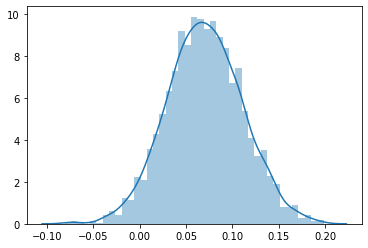

In [133]:
sns.distplot(model_team.beta_b_0)

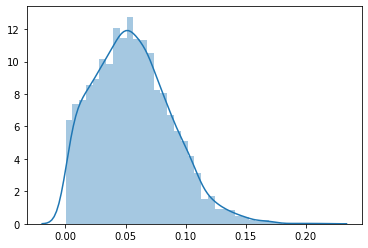

In [147]:
sns.distplot(model_team.sigma_a)

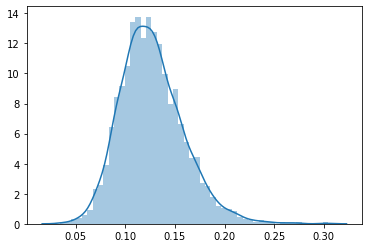

In [148]:
sns.distplot(model_team.sigma_b)

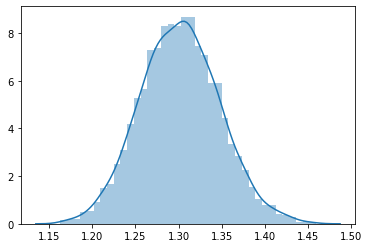

In [140]:
sns.distplot(model_team.gamma)

In [171]:
model_team.predict_future_matches(pd.DataFrame({'home_team':['MUN'], 'away_team':['MCI']}))

,home_team,away_team,pr_home,pr_away,pr_draw
0,MUN,MCI,0.310053,0.440218,0.249729


2.0038539495685375

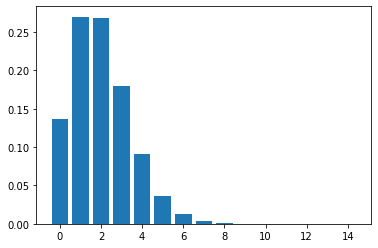

In [211]:
prob_score_n = [model_team.score_n_probability(n, 'MCI', 'MUN') for n in range(15)]
plt.bar(range(15), prob_score_n)
sum([n*prob_score_n[n] for n in range(15)])/sum(prob_score_n)

In [329]:
df = model_team.simulate_match('MUN', 'MCI')
print(df.mean())
print(df.quantile(0.1))
print(df.quantile(0.9))

MUN    1.23300
MCI    1.54675
dtype: float64
MUN    0.0
MCI    0.0
Name: 0.1, dtype: float64
MUN    3.0
MCI    3.0
Name: 0.9, dtype: float64


In [206]:
model_team.simulate_match('MCI', 'MUN').mean()

MCI    1.9780
MUN    0.9805
dtype: float64

In [208]:
model_team.simulate_match('MCI', 'AVL').mean()

MCI    3.57675
AVL    0.50850
dtype: float64